In [370]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [371]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value

np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)
# for later versions:
# session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# tf.compat.v1.keras.backend.set_session(sess)

In [372]:
# import data
df = pd.read_csv("Churn Modeling.csv", index_col=0)
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   

           EstimatedSalary  Exited  
RowNumber                           
1                101348.88       1  
2                112542.58       0  
3                113931.57       1  
4                 93826.63       0  
5                 79084.10       0

In [373]:

df.shape

(10000, 13)

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [375]:
# df1 = df.info()
# df1 = pd.DataFrame(df1)
# print(df1)
# df1.to_csv('df2.csv',index=True)
pd.DataFrame(df.dtypes, columns=["dtypes"])

dtypes
CustomerId         int64
Surname           object
CreditScore        int64
Geography         object
Gender            object
Age                int64
Tenure             int64
Balance          float64
NumOfProducts      int64
HasCrCard          int64
IsActiveMember     int64
EstimatedSalary  float64
Exited             int64

In [376]:
df.describe()

CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   
min         1.000000      0.00000        0.000000        11.580000   
25%         1.000000      0.00000        0.000000     51002.110000   
50%         1.000000      1.00000        1.000000    100193.915000   
75%         2.000000      1.00000        1.000000    149388.247500   
max         4.000000      1.00000        1.000000    199992.480000   

             Exited  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

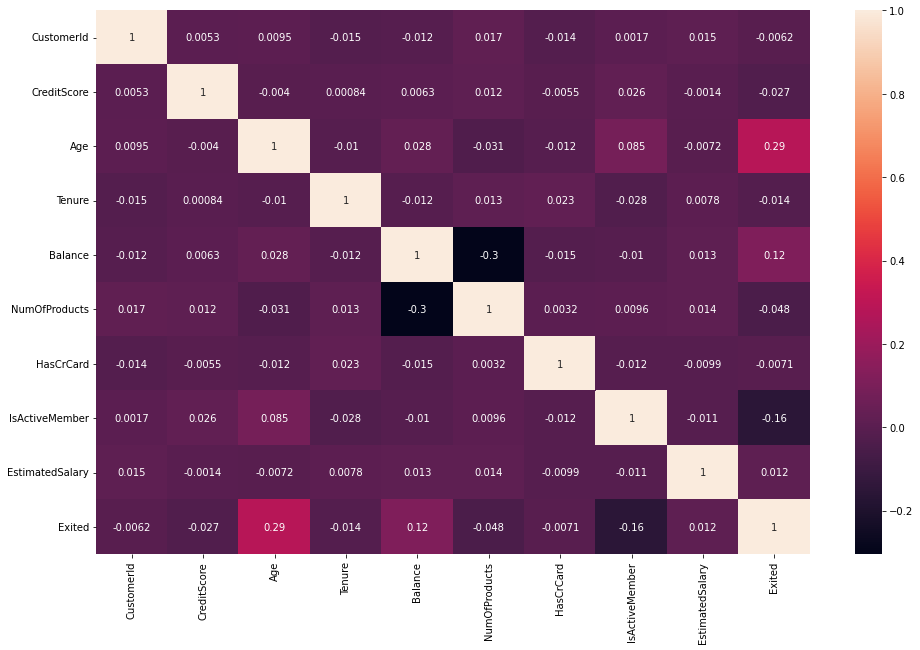

In [377]:
plt.figure(figsize = (16,10))

sns.heatmap(df.corr(), annot =True)

#Data Visualisation

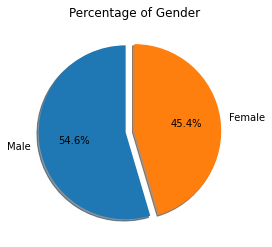

In [378]:
values= df['Gender'].value_counts()
labels = df['Gender'].unique().tolist()
explode = (0.1,0)
labels.reverse()
plt.pie(values, labels=labels, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Percentage of Gender")
plt.show()

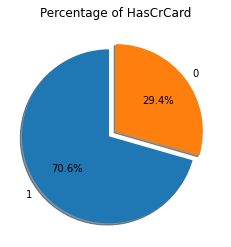

1    7055
0    2945
Name: HasCrCard, dtype: int64


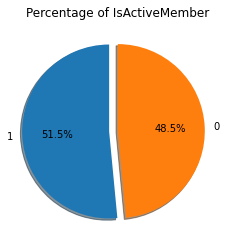

1    5151
0    4849
Name: IsActiveMember, dtype: int64


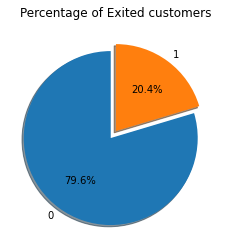

0    7963
1    2037
Name: Exited, dtype: int64


In [379]:
values= df['HasCrCard'].value_counts()
labels = df['HasCrCard'].unique().tolist()
explode = (0.1,0)

plt.pie(values, labels=labels, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Percentage of HasCrCard")
plt.show()
print(values)

values1= df['IsActiveMember'].value_counts()
labels1 = df['IsActiveMember'].unique().tolist()
explode = (0.1,0)

plt.pie(values1, labels=labels1, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Percentage of IsActiveMember")
plt.show()
print(values1)

values2= df['Exited'].value_counts()
labels2 = df['Exited'].unique().tolist()
explode = (0.1,0)

labels2.reverse()
plt.pie(values2, labels=labels2, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Percentage of Exited customers")
plt.show()
print(values2)

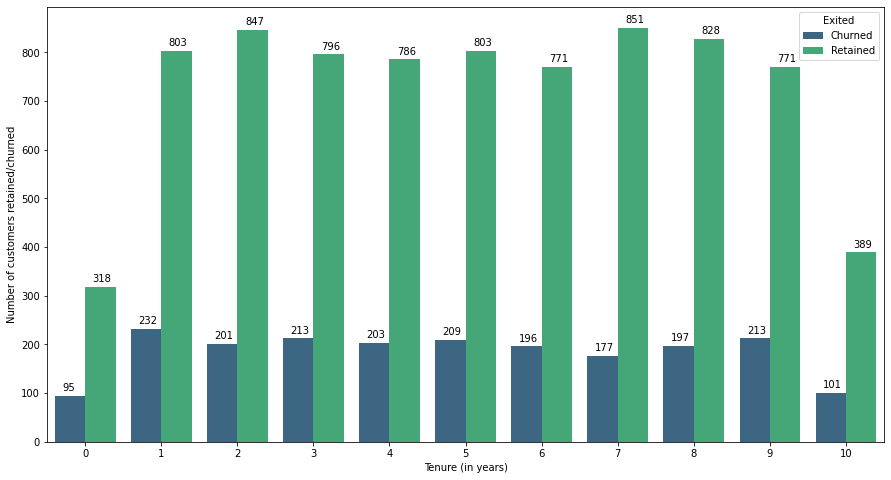

In [380]:
fig, ax = plt.subplots(figsize=(15,8))
df_tenure_plot = df.copy()
df_tenure_plot['Exited'] = df_tenure_plot['Exited'].replace(0,"Retained")
df_tenure_plot['Exited'] = df_tenure_plot['Exited'].replace(1,"Churned")
df_tenure_plot
c = sns.countplot(x ='Tenure', hue='Exited', data = df_tenure_plot, palette='viridis', ax=ax)
c.set_xlabel('Tenure (in years)')
c.set_ylabel('Number of customers retained/churned')
for p in c.patches:
        c.annotate('{:1d}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

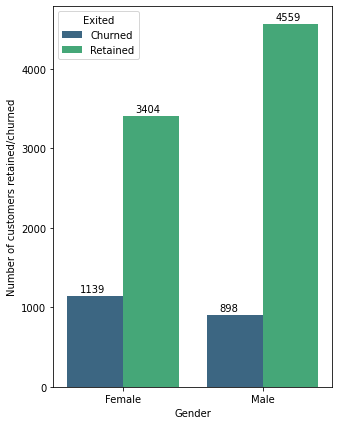

In [381]:
fig, ax = plt.subplots(figsize=(5,7))
df_gender_plot = df.copy()
df_gender_plot['Exited'] = df_gender_plot['Exited'].replace(0,"Retained")
df_gender_plot['Exited'] = df_gender_plot['Exited'].replace(1,"Churned")
df_gender_plot
c = sns.countplot(x ='Gender', hue='Exited', data = df_gender_plot, palette='viridis', ax=ax)
c.set_xlabel('Gender')
c.set_ylabel('Number of customers retained/churned')
for p in c.patches:
        c.annotate('{:1d}'.format(p.get_height()), (p.get_x()+0.09, p.get_height()+50))

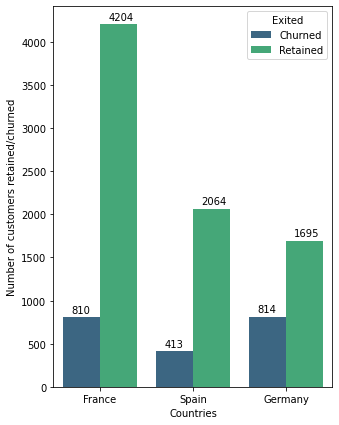

In [382]:
fig, ax = plt.subplots(figsize=(5,7))
df_geography_plot = df.copy()
df_geography_plot['Exited'] = df_geography_plot['Exited'].replace(0,"Retained")
df_geography_plot['Exited'] = df_geography_plot['Exited'].replace(1,"Churned")
df_geography_plot
c = sns.countplot(x ='Geography', hue='Exited', data = df_geography_plot, palette='viridis', ax=ax)
c.set_xlabel('Countries')
c.set_ylabel('Number of customers retained/churned')
for p in c.patches:
        c.annotate('{:1d}'.format(p.get_height()), (p.get_x()+0.09, p.get_height()+50))

In [383]:
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   

           EstimatedSalary  Exited  
RowNumber                           
1                101348.88       1  
2                112542.58       0  
3                113931.57       1  
4                 93826.63       0  
5                 79084.10       0

In [384]:
# fig, ax = plt.subplots(figsize=(5,7))
# df_Numproducts_plot = df
# df_Numproducts_plot['Exited'] = df_Numproducts_plot['Exited'].replace(0,"Retained")
# df_Numproducts_plot['Exited'] = df_Numproducts_plot['Exited'].replace(1,"Churned")
# df_Numproducts_plot
# c = sns.countplot(x ='NumOfProducts', hue='Exited', data = df_Numproducts_plot, palette='viridis', ax=ax)
# c.set_xlabel('Number of products')
# c.set_ylabel('Number of customers retained/churned')
# for p in c.patches:
#          c.annotate('{:1f}'.format(p.get_height()), (p.get_x()+0.09, p.get_height()+50))


fig = px.histogram(df, x="NumOfProducts", color="Exited", barmode="group", text_auto=True, color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis_title="Number of Products")
fig.update_layout(yaxis_title="Number of customers Churned/Retained")
fig.show()

In [385]:
fig = px.histogram(df, x="Age", color="Exited", barmode="group", text_auto=True, color_discrete_sequence=px.colors.qualitative.Pastel, nbins=8)
fig.update_layout(xaxis_title="Age")
fig.update_layout(yaxis_title="Number of customers Churned/Retained")
fig.update_layout(
    xaxis = {
        "tickmode":"array",
        "tickvals":[14.5, 24.5, 34.5, 44.5, 54.5, 64.5, 74.5, 84.5, 94.5],
        "ticktext":["10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99"]
    }
)
fig.show()

In [386]:
fig = px.histogram(df, x="Balance", color="Exited", barmode="group", text_auto=True, color_discrete_sequence=px.colors.qualitative.Pastel, nbins=10)
fig.update_layout(xaxis_title="Balance")
fig.update_layout(yaxis_title="Number of customers Churned/Retained")
fig.update_layout(
    xaxis = {
        "tickmode":"array",
        "tickvals":[0,50000,100000,150000,200000,250000],
        "ticktext":["0-25K", "25K-75K", "75K-125K", "125K-175K", "175K-225K", "225K-275K"]
    }
)

fig.show()

In [387]:
fig = px.histogram(df, x="CreditScore", color="Exited", barmode="group", text_auto=True, color_discrete_sequence=px.colors.qualitative.Pastel, nbins=6)
fig.update_layout(xaxis_title="Credit Score")
fig.update_layout(yaxis_title="Number of customers Churned/Retained")
fig.update_layout(
    xaxis = {
        "tickmode":"array",
        "tickvals":[350,450,550,650,750,850],
        "ticktext":["300-399", "400-499", "500-599", "600-699", "700-799", "800-899"]
    }
)

fig.show()

In [388]:
fig = px.histogram(df, x="EstimatedSalary", color="Exited", barmode="group", text_auto=True, color_discrete_sequence=px.colors.qualitative.Pastel, nbins=5)
fig.update_layout(xaxis_title="Estimated Salary")
fig.update_layout(yaxis_title="Number of customers Churned/Retained")
fig.update_layout(
    xaxis = {
        "tickmode":"array",
        "tickvals":[0,50000,100000,150000,200000],
        "ticktext":["0-25K", "25K-75K", "75K-125K", "125K-175K", "175K-225K"]
    }
)

fig.show()

In [389]:
fig = px.histogram(df, x="Balance", color="NumOfProducts", barmode="group", text_auto=True, color_discrete_sequence=px.colors.qualitative.Pastel, nbins=10, category_orders={"NumOfProducts":[1, 2, 3, 4]})
fig.update_layout(xaxis_title="Balance")
fig.update_layout(yaxis_title="count")
fig.update_layout(
    xaxis = {
        "tickmode":"array",
        "tickvals":[0,50000,100000,150000,200000,250000],
        "ticktext":["0-25K", "25K-75K", "75K-125K", "125K-175K", "175K-225K","225K-275K"]
    }
)
fig.show()

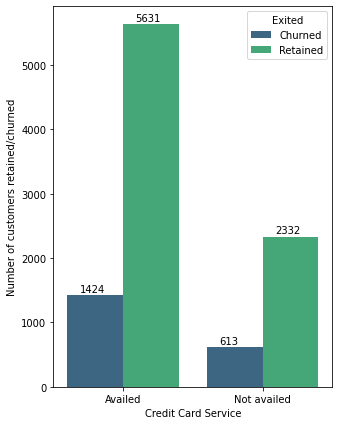

In [390]:
fig, ax = plt.subplots(figsize=(5,7))
df_hascrcard_plot = df.copy()
df_hascrcard_plot['Exited'] = df_hascrcard_plot['Exited'].replace(0,"Retained")
df_hascrcard_plot['Exited'] = df_hascrcard_plot['Exited'].replace(1,"Churned")
df_hascrcard_plot['HasCrCard'] = df_hascrcard_plot['HasCrCard'].replace(0,"Not availed")
df_hascrcard_plot['HasCrCard'] = df_hascrcard_plot['HasCrCard'].replace(1,"Availed")
df_hascrcard_plot
c = sns.countplot(x ='HasCrCard', hue='Exited', data = df_hascrcard_plot, palette='viridis', ax=ax)
c.set_xlabel('Credit Card Service')
c.set_ylabel('Number of customers retained/churned')
for p in c.patches:
        c.annotate('{:1d}'.format(p.get_height()), (p.get_x()+0.09, p.get_height()+50))

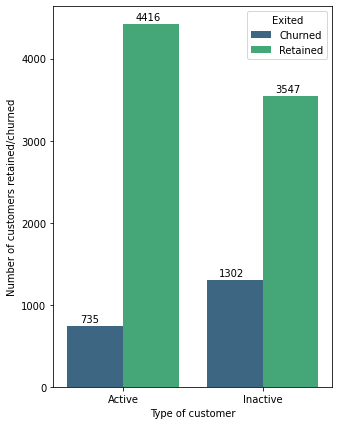

In [391]:
fig, ax = plt.subplots(figsize=(5,7))
df_IsActiveMember_plot = df.copy()
df_IsActiveMember_plot['Exited'] = df_IsActiveMember_plot['Exited'].replace(0,"Retained")
df_IsActiveMember_plot['Exited'] = df_IsActiveMember_plot['Exited'].replace(1,"Churned")
df_IsActiveMember_plot['IsActiveMember'] = df_IsActiveMember_plot['IsActiveMember'].replace(0,"Inactive")
df_IsActiveMember_plot['IsActiveMember'] = df_IsActiveMember_plot['IsActiveMember'].replace(1,"Active")
df_IsActiveMember_plot
c = sns.countplot(x ='IsActiveMember', hue='Exited', data = df_IsActiveMember_plot, palette='viridis', ax=ax)
c.set_xlabel('Type of customer')
c.set_ylabel('Number of customers retained/churned')
for p in c.patches:
        c.annotate('{:1d}'.format(p.get_height()), (p.get_x()+0.09, p.get_height()+50))

In [392]:
#ax = sns.barplot(x='Geography', y='Exited', data=df, palette='viridis').set(title='Customer churn based on Geographic location',xlabel='Geography(in %)', ylabel='Exited (in %)')

In [393]:
#sns.catplot("Exited", "CreditScore", "Gender", data = df).set(title='Gender vs Credit score vs Exited')


In [394]:
#sns.barplot(x='IsActiveMember', y='Exited', data=df, palette='viridis').set(title='Customer churn vs Active Members')

In [395]:
#sns.barplot(x='NumOfProducts', y='Exited', data=df, palette='viridis').set(title='Customer churn based on Number of Products')

In [396]:
#sns.barplot(x='HasCrCard', y='Exited', data=df, palette='viridis').set(title='Customer churn based on Credit Card ')

In [397]:
#sns.barplot(x='Tenure', y='Exited', data=df, palette='viridis').set(title='Customer churn based on Tenure')

In [398]:
#sns.scatterplot(x='Balance', y= 'CreditScore', data=df).set(title='Balance vs CreditScore')

In [399]:
#sns.scatterplot(x='Age', y= 'EstimatedSalary', data=df).set(title='Age vs EstimatedSalary')

In [400]:
#sns.scatterplot(x='Exited', y= 'EstimatedSalary', data=df).set(title='Age vs EstimatedSalary')

In [401]:
#sns.scatterplot(x='Tenure', y= 'CreditScore', data=df)

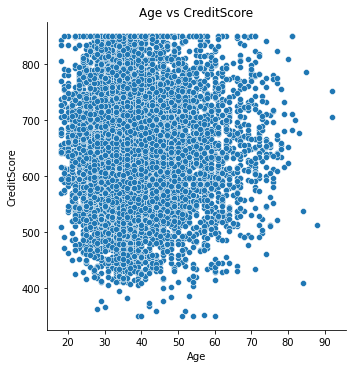

In [402]:
sns.relplot(x='Age', y= 'CreditScore', data=df).set(title='Age vs CreditScore')

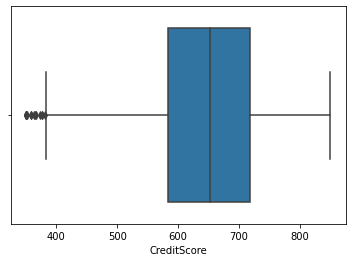

In [403]:
sns.boxplot('CreditScore',data=df)


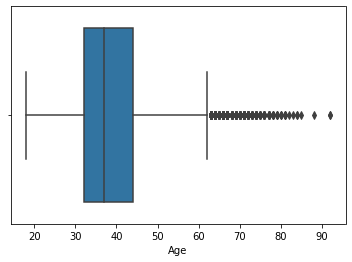

In [404]:
sns.boxplot('Age',data=df)

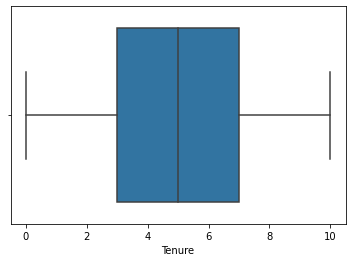

In [405]:
sns.boxplot('Tenure',data=df)

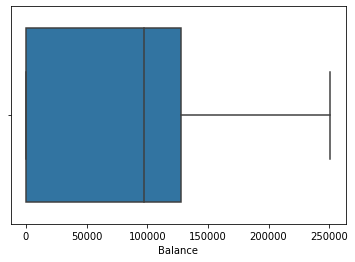

In [406]:
sns.boxplot('Balance',data=df)

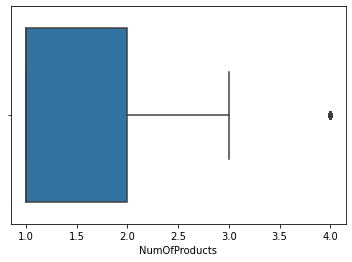

In [407]:
sns.boxplot('NumOfProducts',data=df)

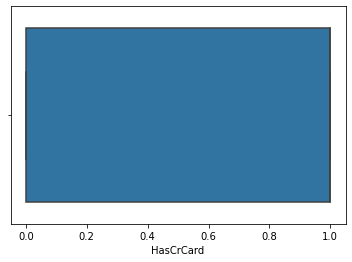

In [408]:
sns.boxplot('HasCrCard',data=df)

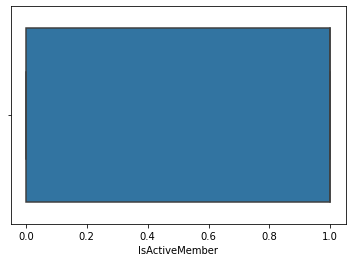

In [409]:
sns.boxplot('IsActiveMember',data=df)

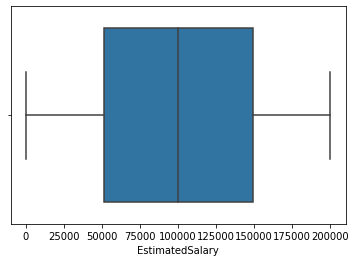

In [410]:
sns.boxplot('EstimatedSalary',data=df)

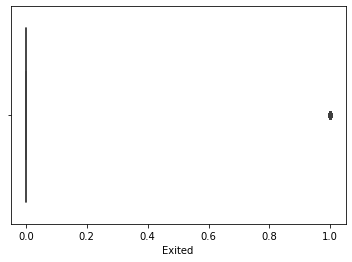

In [411]:
sns.boxplot('Exited',data=df)

# Pre-Processing

In [412]:
# check for null
pd.DataFrame(df.isnull().sum())

0
CustomerId       0
Surname          0
CreditScore      0
Geography        0
Gender           0
Age              0
Tenure           0
Balance          0
NumOfProducts    0
HasCrCard        0
IsActiveMember   0
EstimatedSalary  0
Exited           0

In [413]:
# check for duplicates
df.duplicated().sum()

0

In [414]:
# # drop surname, and cust id
df.drop(['Surname', "CustomerId"], axis=1, inplace=True)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  \
RowNumber                                                          
1                  619    France  Female   42       2       0.00   
2                  608     Spain  Female   41       1   83807.86   
3                  502    France  Female   42       8  159660.80   
4                  699    France  Female   39       1       0.00   
5                  850     Spain  Female   43       2  125510.82   

           NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
RowNumber                                                                     
1                      1          1               1        101348.88       1  
2                      1          0               1        112542.58       0  
3                      3          1               0        113931.57       1  
4                      2          0               0         93826.63       0  
5                      1          1               1         79084.10       0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7aaa27bd0>,
      dtype=object)

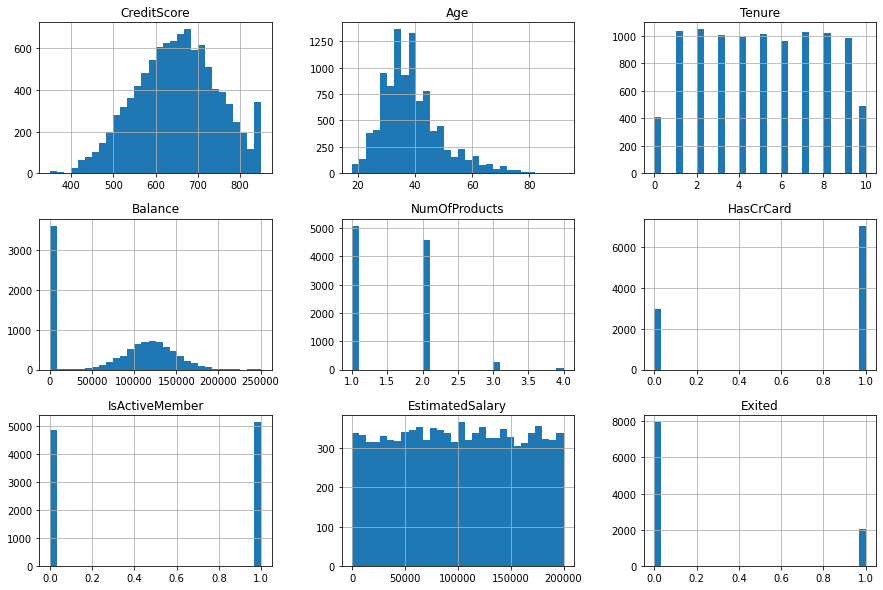

In [415]:
df.hist(bins=30, figsize=(15, 10))

In [416]:
# categorical Variables
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [417]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

## Change categorical data to numeric

In [418]:
df = pd.get_dummies(df)
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
RowNumber                                                                  
1                  619   42       2       0.00              1          1   
2                  608   41       1   83807.86              1          0   
3                  502   42       8  159660.80              3          1   
4                  699   39       1       0.00              2          0   
5                  850   43       2  125510.82              1          1   

           IsActiveMember  EstimatedSalary  Exited  Geography_France  \
RowNumber                                                              
1                       1        101348.88       1                 1   
2                       1        112542.58       0                 0   
3                       0        113931.57       1                 1   
4                       0         93826.63       0                 1   
5                       1         79084.10       0                 0   

           Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
RowNumber                                                                  
1                          0                0              1            0  
2                          0                1              1            0  
3                          0                0              1            0  
4                          0                0              1            0  
5                          0                1              1            0

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 1.1 MB


# Machine Learning

In [420]:
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
RowNumber                                                                  
1                  619   42       2       0.00              1          1   
2                  608   41       1   83807.86              1          0   
3                  502   42       8  159660.80              3          1   
4                  699   39       1       0.00              2          0   
5                  850   43       2  125510.82              1          1   

           IsActiveMember  EstimatedSalary  Exited  Geography_France  \
RowNumber                                                              
1                       1        101348.88       1                 1   
2                       1        112542.58       0                 0   
3                       0        113931.57       1                 1   
4                       0         93826.63       0                 1   
5                       1         79084.10       0                 0   

           Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
RowNumber                                                                  
1                          0                0              1            0  
2                          0                1              1            0  
3                          0                0              1            0  
4                          0                0              1            0  
5                          0                1              1            0

In [421]:
# split data into train and test
from sklearn.model_selection import train_test_split
# split train to x and y
X = df.drop("Exited", axis="columns")
y = df["Exited"]
# 20% test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2,)
#train_X2, test_X2, train_y2, test_y2 = train_test_split(X, y, test_size=0.1, random_state=0)

In [422]:
print(len(train_X))
print(len(test_X))
print(len(train_y))
print(len(test_y))

8000
2000
8000
2000


In [423]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_X = scaler.fit_transform(train_X)
scaled_train_X = pd.DataFrame(scaled_train_X, columns=train_X.columns)
scaled_test_X = scaler.transform(test_X)
scaled_test_X = pd.DataFrame(scaled_test_X, columns=train_X.columns)

In [424]:
#
SENSITIVITY_THRESHOLD = 0.2

## XGBoost

In [425]:
all_params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}


# xgboost classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()

from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(xgb_classifier,param_distributions=all_params,n_iter=5,scoring='accuracy',cv=5,verbose=3)
random_search.fit(scaled_train_X, train_y)
xgb_classifier = XGBClassifier(**random_search.best_params_)

# training
xgb_classifier.fit(scaled_train_X, train_y)

# predictions
# xgb_predictions = xgb_classifier.predict(scaled_test_X)
# use threshold
xgb_predictions = [0 if res[1] < SENSITIVITY_THRESHOLD else 1 for res in xgb_classifier.predict_proba(scaled_test_X)]

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=7;, score=0.848 total time=   0.4s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=7;, score=0.862 total time=   0.4s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=7;, score=0.850 total time=   0.4s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=7;, score=0.851 total time=   0.4s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=7;, score=0.860 total time=   0.4s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=7;, score=0.851 total time=   0.7s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=7;, score=0.868 total time=   0.7s
[CV 3/5] END colsample_byt

In [426]:
xgb_classifier.predict_proba(scaled_test_X)

array([[0.7293558 , 0.27064422],
       [0.68304443, 0.31695557],
       [0.84634686, 0.15365317],
       ...,
       [0.938977  , 0.06102299],
       [0.8562793 , 0.14372067],
       [0.77984756, 0.22015245]], dtype=float32)

## Logistic Regression

In [427]:
train_y.value_counts()

0    6368
1    1632
Name: Exited, dtype: int64

In [428]:
# Logistic regression classifier
from sklearn.linear_model import LogisticRegression
log_regression_classifier = LogisticRegression()

# training
log_regression_classifier.fit(scaled_train_X, train_y)

# predictions
#log_regression_predictions = log_regression_classifier.predict(scaled_test_X)
#log_regression_predictions = [0 if res < SENSITIVITY_THRESHOLD else 1 for res in log_regression_classifier.predict_proba(scaled_test_x)]
log_regression_predictions = [0 if res[1] < SENSITIVITY_THRESHOLD else 1 for res in log_regression_classifier.predict_proba(scaled_test_X)]

## Random Forest

In [429]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

#training
rf_classifier.fit(scaled_train_X,train_y)

#predictions

#rf_predictions = rf_classifier.predict(scaled_test_X)
#rf_predictions = [0 if res < SENSITIVITY_THRESHOLD else 1 for res in rf_classifier.predict_proba(scaled_test_x)]
rf_predictions = [0 if res[1] < SENSITIVITY_THRESHOLD else 1 for res in rf_classifier.predict_proba(scaled_test_X)]

In [430]:
print(rf_predictions)


[1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [431]:
#len(rf_predictions.sort())

In [432]:
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
RowNumber                                                                  
1                  619   42       2       0.00              1          1   
2                  608   41       1   83807.86              1          0   
3                  502   42       8  159660.80              3          1   
4                  699   39       1       0.00              2          0   
5                  850   43       2  125510.82              1          1   

           IsActiveMember  EstimatedSalary  Exited  Geography_France  \
RowNumber                                                              
1                       1        101348.88       1                 1   
2                       1        112542.58       0                 0   
3                       0        113931.57       1                 1   
4                       0         93826.63       0                 1   
5                       1         79084.10       0                 0   

           Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
RowNumber                                                                  
1                          0                0              1            0  
2                          0                1              1            0  
3                          0                0              1            0  
4                          0                0              1            0  
5                          0                1              1            0

In [433]:

feature_names = np.array(df.drop("Exited", axis="columns").columns)




# Extract single tree
rf_estimator = rf_classifier.estimators_[2]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(rf_estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = np.array(["0", "1"]),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [434]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

#training
knn_classifier.fit(scaled_train_X,train_y)

#predictions

#knn_predictions = knn_classifier.predict(scaled_test_X)
#knn_predictions = [0 if res < SENSITIVITY_THRESHOLD else 1 for res in knn_classifier.predict_proba(scaled_test_x)]
knn_predictions = [0 if res[1] < SENSITIVITY_THRESHOLD else 1 for res in knn_classifier.predict_proba(scaled_test_X)]

In [435]:
# SVM
from sklearn.svm import SVC
svm_classifier = SVC(probability=True)

#training
svm_classifier.fit(scaled_train_X,train_y)

#predictions
# svm_predictions = svm_classifier.predict(scaled_test_X)
svm_predictions = [0 if res[1] < SENSITIVITY_THRESHOLD else 1 for res in svm_classifier.predict_proba(scaled_test_X)]

## Using ANNs

In [436]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [437]:
# Initialising the ANN
ann_classifier = Sequential()

# Adding the input layer and the first hidden layer
ann_classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
ann_classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))

# Adding the output layer
ann_classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
ann_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
ann_classifier.fit(scaled_train_X,train_y,batch_size = 10,
    # change to 1000 for final run (300 was better)
    epochs=2,
)

Epoch 1/2
800/800 [==============================] - 1s 1ms/step - loss: 0.4808 - accuracy: 0.7956
Epoch 2/2
800/800 [==============================] - 1s 1ms/step - loss: 0.4288 - accuracy: 0.7960


In [438]:
ann_predictions = ann_classifier.predict(scaled_test_X)
ann_predictions = [int(item[0]>SENSITIVITY_THRESHOLD) for item in ann_predictions]

In [439]:

!pip install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [440]:
from ann_visualizer.visualize import ann_viz;

ann_viz(ann_classifier, title="The neural network structure", filename="ann.png")

## Comparision

In [441]:
# function to get all required metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


def get_metrics(y_true, y_pred):
  cr = classification_report(y_true, y_pred, output_dict=True)
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred)
  sens = cr["1"]["recall"]
  spec = cr["0"]["recall"]
  return {
      "accuracy":acc,
      "precision":prec,
      "sensitivity":sens,
      "specificity":spec
  }

def create_confusion_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  fig = px.imshow(cm, text_auto=True)
  fig.update_layout(xaxis_title="Predictions")
  fig.update_layout(yaxis_title="Actual values")
  if title:
    fig.update_layout(title={
            'text' : title,
            'x':0.5,
            'xanchor': 'center'})
  fig.show()

In [442]:
create_confusion_matrix(test_y, xgb_predictions, "XG Boost")


In [443]:
create_confusion_matrix(test_y, ann_predictions, "ANN")


In [444]:
create_confusion_matrix(test_y, log_regression_predictions, "Logistic Regression")


In [445]:
create_confusion_matrix(test_y, rf_predictions, "Random Forest")


In [446]:
create_confusion_matrix(test_y, knn_predictions, "KNN")


In [447]:
create_confusion_matrix(test_y, svm_predictions, "SVM")

In [448]:
ann_metrics = get_metrics(test_y, ann_predictions)
xgb_metrics = get_metrics(test_y, xgb_predictions)
log_regression_metrics = get_metrics(test_y, log_regression_predictions)
rf_metrics = get_metrics(test_y, rf_predictions)
knn_metrics = get_metrics(test_y, knn_predictions)
svm_metrics = get_metrics(test_y, svm_predictions)
print("ANN", ann_metrics)
print("XGB", xgb_metrics)
print("LOG", log_regression_metrics)
print("RF", rf_metrics)
print("KNN", knn_metrics)
print("SVM", svm_metrics)

ANN {'accuracy': 0.6585, 'precision': 0.3475877192982456, 'sensitivity': 0.782716049382716, 'specificity': 0.6269592476489029}
XGB {'accuracy': 0.7755, 'precision': 0.4679300291545189, 'sensitivity': 0.7925925925925926, 'specificity': 0.7711598746081505}
LOG {'accuracy': 0.691, 'precision': 0.36704119850187267, 'sensitivity': 0.725925925925926, 'specificity': 0.6821316614420063}
RF {'accuracy': 0.7605, 'precision': 0.44959128065395093, 'sensitivity': 0.8148148148148148, 'specificity': 0.7467084639498432}
KNN {'accuracy': 0.6315, 'precision': 0.33564356435643566, 'sensitivity': 0.837037037037037, 'specificity': 0.5793103448275863}
SVM {'accuracy': 0.8265, 'precision': 0.5573122529644269, 'sensitivity': 0.6962962962962963, 'specificity': 0.8595611285266458}


In [449]:
import numpy as np
 
importances = rf_classifier.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df.columns[1:]
 
for f in range(train_X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))
    
    

 1) Tenure                         0.233471
 2) Exited                         0.145577
 3) NumOfProducts                  0.145131
 4) Age                            0.144372
 5) HasCrCard                      0.130189
 6) Balance                        0.083793
 7) EstimatedSalary                0.039276
 8) Geography_Germany              0.021175
 9) IsActiveMember                 0.018375
10) Geography_France               0.011115
11) Geography_Spain                0.009548
12) Gender_Male                    0.009379
13) Gender_Female                  0.008599


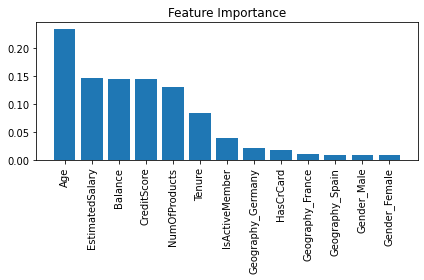

In [450]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(train_X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(train_X.shape[1]), train_X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Experimenting the best model Random Forest with important variables based on Feature importance and Correlation matrix i.e Age, Balance, Active and NumofProducts to see the model performance

In [452]:
dfx = pd.read_csv("Churn Modeling.csv", index_col=0)

dfx.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   

           EstimatedSalary  Exited  
RowNumber                           
1                101348.88       1  
2                112542.58       0  
3                113931.57       1  
4                 93826.63       0  
5                 79084.10       0

In [453]:
dfx=dfx[["Age", "Balance", "IsActiveMember","NumOfProducts"]]

In [454]:
# split data into train and test
from sklearn.model_selection import train_test_split
# split train to x and y
X = df.drop("Exited", axis="columns")
y = df["Exited"]
# 20% test
#train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2,)
train_X2, test_X2, train_y2, test_y2 = train_test_split(X, y, test_size=0.2)

In [455]:
print(len(train_X2))
print(len(test_X2))
print(len(train_y2))
print(len(test_y2))

8000
2000
8000
2000


In [456]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_X2 = scaler.fit_transform(train_X2)
scaled_train_X2 = pd.DataFrame(scaled_train_X2, columns=train_X2.columns)
scaled_test_X2 = scaler.transform(test_X2)
scaled_test_X2 = pd.DataFrame(scaled_test_X2, columns=train_X2.columns)

In [457]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

#training
rf_classifier.fit(scaled_train_X2,train_y2)

#predictions

#rf_predictions = rf_classifier.predict(scaled_test_X)
#rf_predictions = [0 if res < SENSITIVITY_THRESHOLD else 1 for res in rf_classifier.predict_proba(scaled_test_x)]
rf_predictions = [0 if res[1] < SENSITIVITY_THRESHOLD else 1 for res in rf_classifier.predict_proba(scaled_test_X2)]

In [458]:
rf_metrics = get_metrics(test_y2, rf_predictions)

In [459]:
print("RF", rf_metrics)

RF {'accuracy': 0.7565, 'precision': 0.45161290322580644, 'sensitivity': 0.8096385542168675, 'specificity': 0.7425867507886436}
